# 실습과제#5 Training Models[1] - Linear Regression
학번:  2019250059                   
이름: 한민욱

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [98]:
%cd /content/drive/MyDrive/Practice/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/'
/content


In [99]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure",fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi = resolution)

  import warnings
  warnings.filterwarnings(action="ignore",message="^internal gelsd")
  #numpy 패키지를 import하고, 난수 발생 시드를 설정하기 위해 np.random.seed(42)를 사용합니다. 이렇게 하면 난수 발생 시드가 고정되어 재현성을 확보할 수 있습니다.

#matplotlib 패키지를 import하고, mpl 객체를 사용하여 그래프의 레이블 크기를 설정합니다.

#프로젝트의 루트 디렉토리, 챕터 ID, 이미지 파일을 저장할 경로 등을 설정합니다.
#save_fig 함수는 그래프를 이미지 파일로 저장하는 함수입니다. fig_id는 그래프의 식별자이고, tight_layout은 그래프의 여백을 조절하는 매개변수입니다. fig_extension은 저장할 이미지 파일의 확장자이고, resolution은 이미지의 해상도를 설정합니다.

In [100]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

Saving figure generated_data_plot


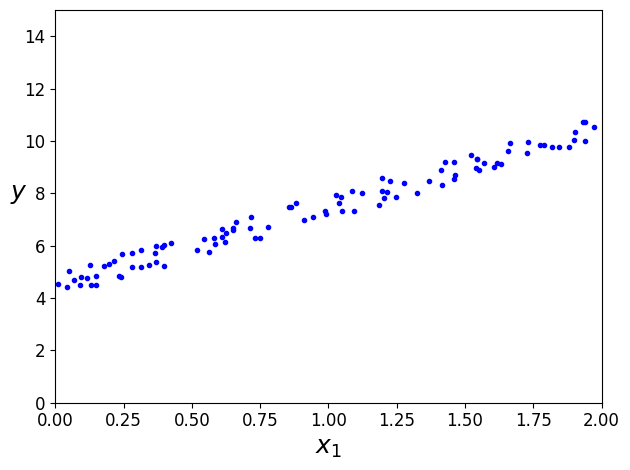

2019250059 한민욱


In [101]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()
print("2019250059 한민욱")
#plt.plot(X, y, "b.")는 X와 y 데이터를 산점도 그래프로 그리는 부분입니다. "b."는 파란색 점으로 표시하라는 의미입니다.

#plt.xlabel("$x_1$", fontsize=18)는 x축의 레이블을 "$x_1$"로 설정하고, 글꼴 크기를 18로 지정하는 부분입니다.

#plt.ylabel("$y$", rotation=0, fontsize=18)는 y축의 레이블을 "$y$"로 설정하고, 레이블을 회전시키지 않고(0도), 글꼴 크기를 18로 지정하는 부분입니다.

In [102]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [103]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [104]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

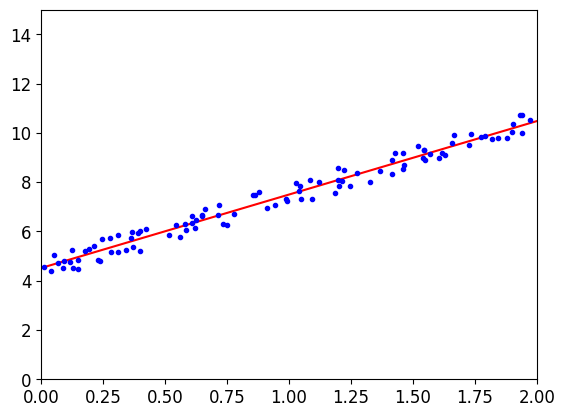

2019250059 한민욱


In [105]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()
print("2019250059 한민욱")

Saving figure linear_model_predictions_plot


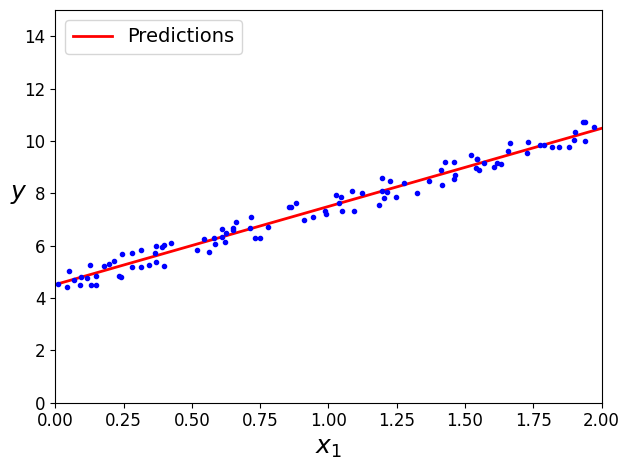

2019250059 한민욱


In [106]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()
print("2019250059 한민욱")
#plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")는 X_new와 y_predict를 선 그래프로 그리는 부분입니다. "r-"은 빨간색 선으로 그리고, 선의 두께는 2로 지정되었습니다. 라벨은 "Predictions"로 지정되었습니다.

#plt.plot(X, y, "b.")는 X와 y 데이터를 산점도 그래프로 그리는 부분입니다. "b."는 파란색 점으로 표시하라는 의미입니다.

#plt.xlabel("$x_1$", fontsize=18)는 x축의 레이블을 "$x_1$"로 설정하고, 글꼴 크기를 18로 지정하는 부분입니다.

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
print("2019250059 한민욱")

2019250059 한민욱


In [108]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [109]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y , rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [110]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

In [111]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta *gradients

In [112]:
theta

array([[4.51359766],
       [2.98323418]])

In [113]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [114]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#plot_gradient_descent(theta, eta, theta_path=None)는 경사 하강법을 시각화하는 함수입니다. theta는 초기 모델의 파라미터, eta는 학습 속도를 나타냅니다. theta_path는 theta의 변화를 저장할 리스트입니다.

#먼저, plt.plot(X, y, "b.")는 X와 y 데이터를 파란색 점으로 표시하는 부분입니다.

#n_iterations = 1000은 반복 횟수를 1000으로 설정합니다.

#for iteration in range(n_iterations):는 주어진 반복 횟수만큼 반복합니다.

#if iteration < 10:은 처음 10회에 대해서만 그래프를 그리는 조건문입니다. y_predict = X_new_b.dot(theta)로 예측값을 계산하고, style = "b-" if iteration > 0 else "r--"으로 그래프의 스타일을 지정합니다. 첫 번째 그래프는 빨간 점선으로 그리고, 그 이후에는 파란 실선으로 그립니다.

Saving figure gradient_descent_plot


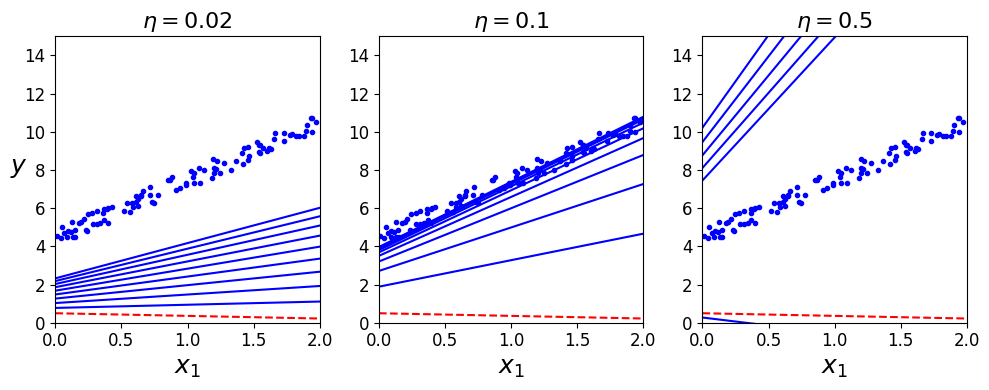

2019250059 한민욱


In [115]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()
print("2019250059 한민욱")

In [116]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


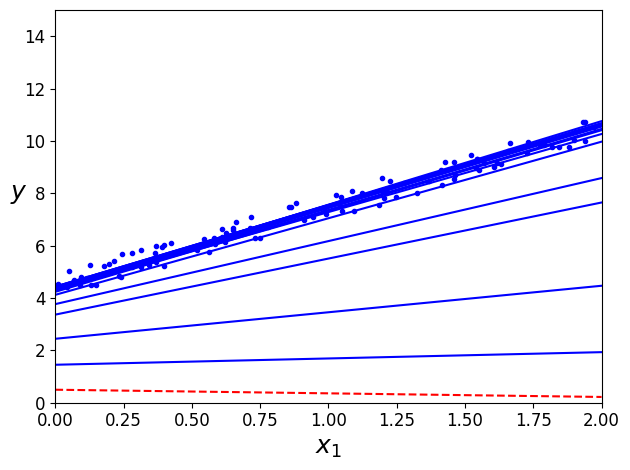

2019250059 한민욱


In [117]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()
print("2019250059 한민욱")
#초기 설정: epoch의 수(n_epochs), 학습 스케줄 함수(learning_schedule), 파라미터(theta) 등을 설정합니다.
#주어진 epoch 수(n_epochs)만큼 반복합니다.
#데이터셋(X, y)의 샘플을 랜덤하게 선택하여 확률적 경사 하강법을 수행합니다.
#첫 번째 epoch에서 처음 20개의 샘플에 대해 예측값을 계산하고 시각화합니다.
#랜덤하게 선택된 샘플에 대해 경사(gradient)를 계산하고, 학습률(learning_rate)을 계산하여 파라미터(theta)를 업데이트합니다.
#업데이트된 파라미터(theta)를 기록합니다.

In [118]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [119]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [120]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

In [121]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
#theta_path_mgd라는 빈 리스트를 생성합니다. 이 리스트는 업데이트된 theta 값을 저장할 목적으로 사용됩니다.

##n_iterations 변수에는 반복 횟수인 50을, minibatch_size 변수에는 미니배치 크기인 20을 할당합니다.

#np.random.seed(42)를 사용하여 난수 발생 시드를 설정하고, theta 변수에는 크기가 2x1인 랜덤한 초기값을 할당합니다.

#learning_schedule 함수는 학습률을 조절하기 위한 함수입니다. t0와 t1은 하이퍼파라미터로, 학습 스케줄을 조절하는 데 사용됩니다.

In [122]:
theta

array([[4.52651397],
       [2.99723869]])

In [123]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


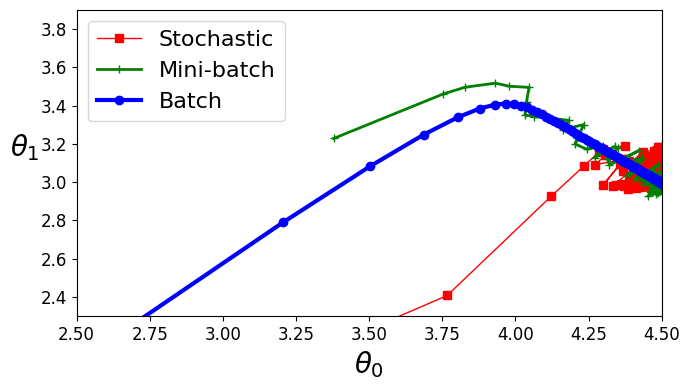

2019250059 한민욱


In [124]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()
print("2019250059 한민욱")

In [125]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)


In [126]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


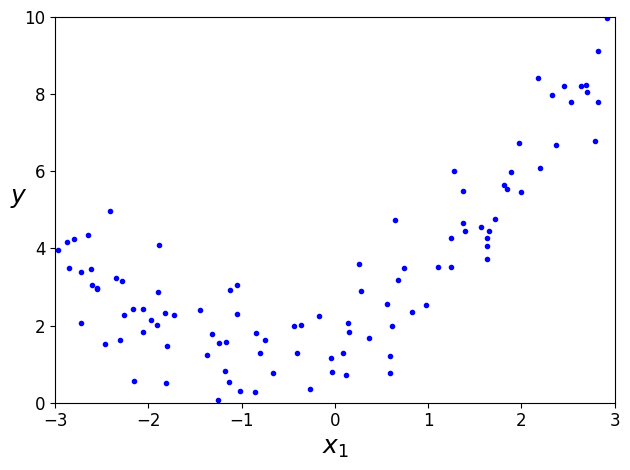

2019250059 한민욱


In [127]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()
print("2019250059 한민욱")

In [128]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [129]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [130]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


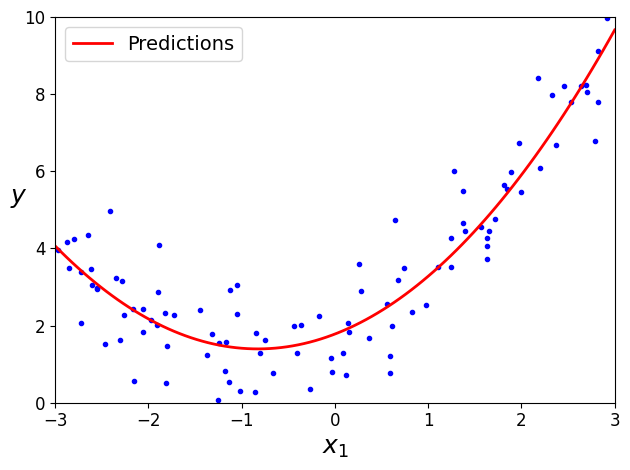

2019250059 한민욱


In [131]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()
print("2019250059 한민욱")
#X_new를 생성하여 -3에서 3까지의 범위에서 100개의 등간격으로 값을 생성합니다.
#poly_features를 사용하여 다항 특성을 생성합니다. 이는 주어진 특성(X_new)을 다항식으로 변환하는 작업을 수행합니다.
#lin_reg를 사용하여 다항 회귀를 수행하고, X_new_poly를 사용하여 새로운 데이터에 대한 예측값(y_new)을 계산합니다.

Saving figure high_degree_polynomials_plot


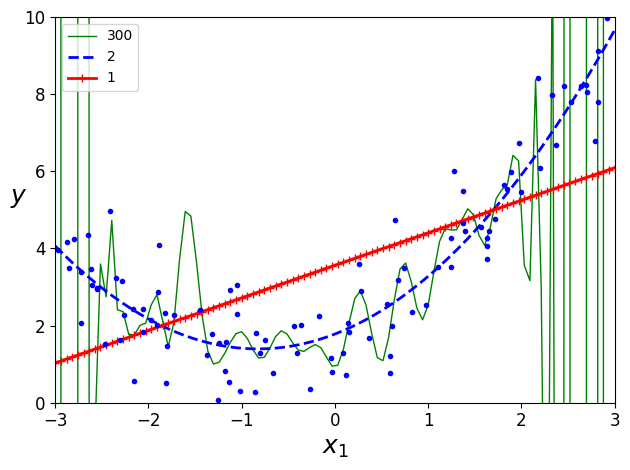

2019250059 한민욱


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()
print("2019250059 한민욱")
#PolynomialFeatures, StandardScaler, LinearRegression 및 Pipeline을 import합니다.
#다항 회귀 모델을 구성하기 위해 다항 특성 생성기(PolynomialFeatures), 특성 스케일링(StandardScaler), 선형 회귀 모델(LinearRegression) 및 데이터 변환 및 모델 학습을 연결하기 위한 파이프라인(Pipeline)을 설정합니다.

In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


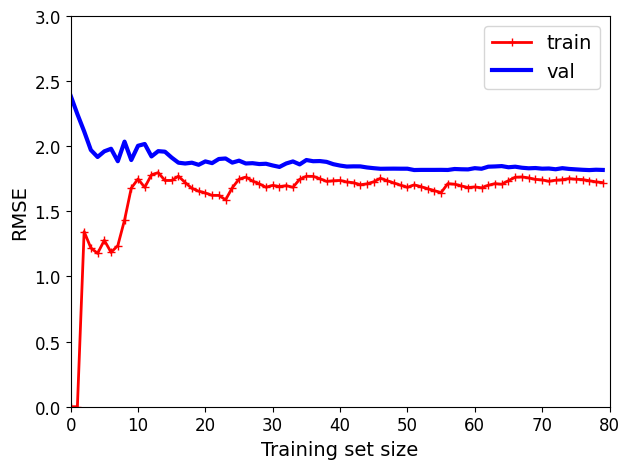

2019250059 한민욱


In [134]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown
print("2019250059 한민욱")

Saving figure learning_curves_plot


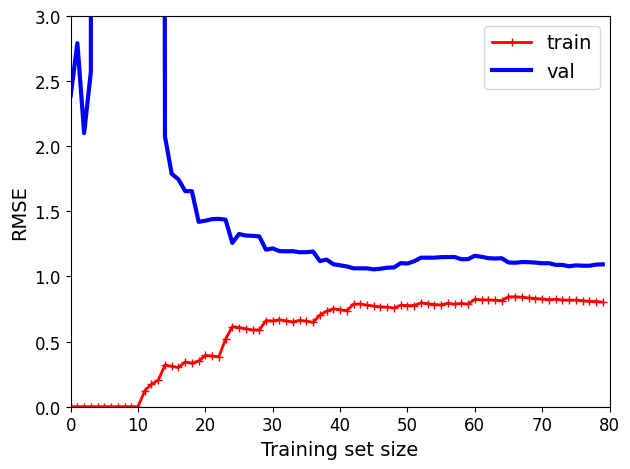

2019250059 한민욱


In [135]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown
print("2019250059 한민욱")

In [136]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [137]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [138]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

Saving figure ridge_regression_plot


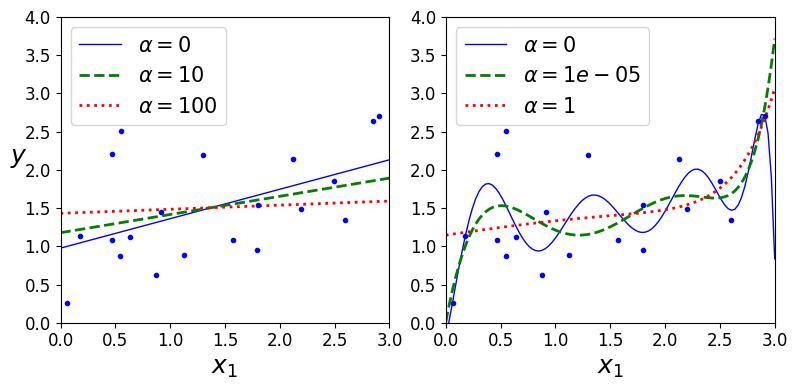

2019250059 한민욱


In [139]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()
print("2019250059 한민욱")
#plot_model 함수 정의: model_class, polynomial, alphas 및 다른 키워드 인자를 받습니다.
#주어진 alphas에 따라 서로 다른 규제 강도(alpha)를 사용하여 Ridge 모델을 생성하고 시각화합니다.
#polynomial이 True이면 다항식 특성을 추가하고 표준화하고, 그렇지 않으면 단순한 선형 회귀 모델을 사용합니다.
#모델을 피팅하고 새로운 데이터(X_new)에 대한 예측을 수행합니다.
#시각화를 위해 다른 alpha 값에 따라 선 스타일을 지정합니다.

In [140]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Saving figure lasso_regression_plot


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


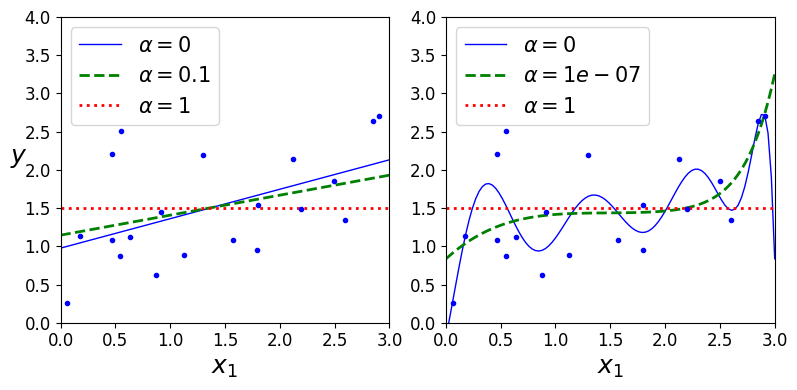

2019250059 한민욱


In [141]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()
print("2019250059 한민욱")

In [142]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [143]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [144]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [145]:
from sklearn.base import clone


poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print("2019250059 한민욱")
    #poly_scaler: 다항 특성을 추가하고 표준화하는 파이프라인을 정의합니다.
    # X_train_poly_scaled, X_val_poly_scaled: 다항 특성을 추가하고 표준화한 후의 훈련 및 검증 세트를 생성합니다.
    # sgd_reg: SGDRegressor를 초기화합니다. 이때 warm_start 매개변수를 True로 설정하여 fit() 메서드가 호출될 때 이전 모델 상태에서 훈련을 이어갑니다.
    # 최적의 모델 탐색: 1000번의 에포크 동안 SGDRegressor를 훈련시키고 검증 세트에서의 성능을 측정하여 최적의 모델을 찾습니다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

2019250059 한민욱


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

Saving figure early_stopping_plot


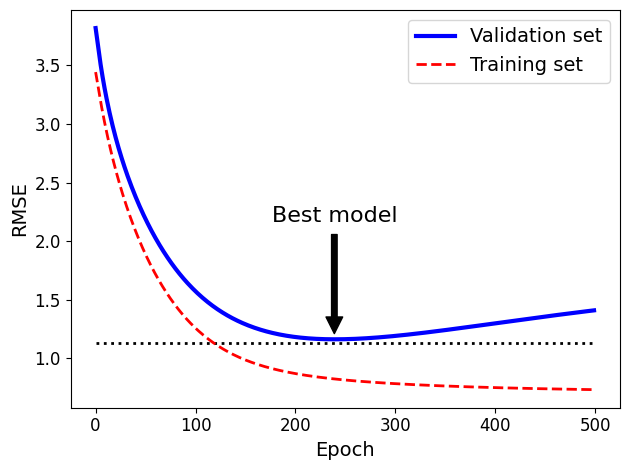

2019250059 한민욱


In [146]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()
print("2019250059 한민욱")
# sgd_reg: SGDRegressor를 초기화합니다. warm_start 매개변수를 True로 설정하여 fit() 메서드가 호출될 때 이전 모델 상태에서 훈련을 이어갈 수 있도록 합니다.
# n_epochs: 반복할 최대 에포크 수를 정의합니다.
# train_errors, val_errors: 훈련 세트와 검증 세트의 RMSE(평균 제곱근 오차)를 저장할 리스트를 초기화합니다.